In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
cc_data = pd.read_csv('cc_approvals.data', header=None)

In [3]:
cc_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [4]:
col = ['Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'EducationLevel', 'Ethnicity', 'YearsEmployed', 'PriorDefault', 'Employed', 
       'CreditScore', 'DriversLicense', 'Citizen', 'ZipCode', 'Income', 'ApprovalStatus']
cc_data.columns = col

cc_data.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [5]:
cc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    object 
 1   Age             690 non-null    object 
 2   Debt            690 non-null    float64
 3   Married         690 non-null    object 
 4   BankCustomer    690 non-null    object 
 5   EducationLevel  690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    object 
 9   Employed        690 non-null    object 
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    object 
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    object 
 14  Income          690 non-null    int64  
 15  ApprovalStatus  690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


In [6]:
cc_data.describe()

,Debt,YearsEmployed,CreditScore,Income
count,690.000000,690.000000,690.00000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507
std,4.978163,3.346513,4.86294,5210.102598
min,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.165000,0.00000,0.000000
50%,2.750000,1.000000,0.00000,5.000000
75%,7.207500,2.625000,3.00000,395.500000
max,28.000000,28.500000,67.00000,100000.000000


#### REPLACING MISSING VALUES WITH NAN

In [7]:
# COUNT TOTAL MISSING VALUES IN DATA
cc_data.isnull().sum().sum()

0

In [8]:
# TURN OUT DATA HAS '?' AS MISSING VALUES
# cnt_qmark = (cc_data == '?').sum().sum()
cnt_qmark = (cc_data == '?').sum()
cnt_qmark

Gender            12
Age               12
Debt               0
Married            6
BankCustomer       6
EducationLevel     9
Ethnicity          9
YearsEmployed      0
PriorDefault       0
Employed           0
CreditScore        0
DriversLicense     0
Citizen            0
ZipCode           13
Income             0
ApprovalStatus     0
dtype: int64

In [9]:
# So we have total of 67 '?' values
# Replace all with Nan
cc_data.replace('?', np.nan, inplace=True)

# CHECK
cnt_qmark_new = (cc_data == '?').sum().sum()
cnt_qmark_new

0

#### HANDLING MISINTERPRETED FEATURES
In our data 'Age' feature is misinterpreted as Object instead of Float

In [10]:
cc_data['Age'] = cc_data['Age'].astype(float)

# Now We have total 5 Numerical Features - which also have missing values in them

#### HANDLING MISSING VALUES
<p> Handling Numerical Missing Values </p>
<ul>
    <li> Remove rows with missing values </li>
    <li> Replace with any Central values such as Mean, Median, Mode
    <li> Check relationship with other numeric values and use Regression [KNN, Linear regression and others] to fill missing values </li>
    <li> Interpolation based on other values and some other most correlated variable - Weighted Average</li>
</ul>

<p> Handling Non-numerical Missing Values </p>
<ul>
    <li> Replace with Mode - most frequent value </li>
    <li> Create new Category if Missing values have certain imp </li>
    <li> Impute Based on relationship - Decision Tree and Logistic Regression, KNN</li>
    <li> Embedding Categorical Varibales </li>    
</ul>

#### TIP - Graphically visualize Feature first

In [11]:
# Count Nan
cnt_na = cc_data.isnull().sum()
cnt_na

Gender            12
Age               12
Debt               0
Married            6
BankCustomer       6
EducationLevel     9
Ethnicity          9
YearsEmployed      0
PriorDefault       0
Employed           0
CreditScore        0
DriversLicense     0
Citizen            0
ZipCode           13
Income             0
ApprovalStatus     0
dtype: int64

<ul><li><p> We have Missing values in Categorical = ['Gender', 'Married', 'BankCustomer', 'EducationLevel', 'Ethnicity', 'ZipCode'] 
    & Numeric = ['Age'] </p></li></ul>

#### HANDLING THE MISSING VALUES IN GENDER

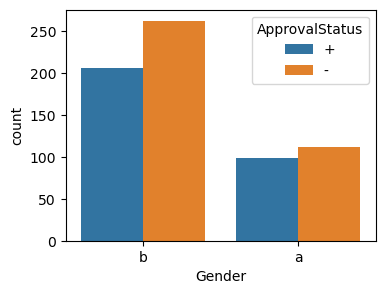

In [12]:
# CHECKING DISTRIBUTION OF 'GENDER' COLUMN
plt.figure(figsize=(4,3))
sns.countplot(data=cc_data, x='Gender', hue='ApprovalStatus')
# sns.countplot(data=cc_data, x='Gender')
plt.show()

In [13]:
cnt_gender = cc_data['Gender'].value_counts()
cnt_gender

b    468
a    210
Name: Gender, dtype: int64

In [14]:
cc_data['Gender'].isnull().sum()

12

In [15]:
# REPLACING MISSING VALUES WITH MODE
cc_data['Gender'] = cc_data['Gender'].fillna(cc_data['Gender'].value_counts().index[0])
cc_data['Gender'].isnull().sum()

0

#### HANDLING MISSING VALUES IN 'MARRIED'

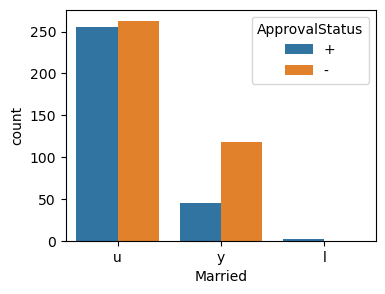

In [16]:
# CHECKING MARRIED DISTRIBUTION
plt.figure(figsize=(4,3))
sns.countplot(data=cc_data, x='Married', hue='ApprovalStatus')
plt.show()

In [17]:
# COUNT #MISSING VALUES
cc_data['Married'].isnull().sum()

6

In [18]:
cc_data['Married'] = cc_data['Married'].fillna(cc_data['Married'].value_counts().index[0])
cc_data['Married'].isnull().sum()

0

##### HANDLING MISSING VALUES IN 'BANKCUSTOMER'

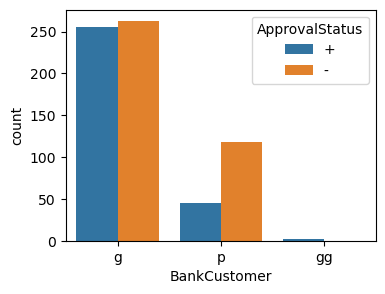

In [19]:
# CHECKING BANKCUSTOMER DISTRIBUTION
plt.figure(figsize=(4,3))
sns.countplot(data=cc_data, x='BankCustomer', hue='ApprovalStatus')
plt.show()

In [20]:
# COUNT #MISSING VALUES
cc_data['BankCustomer'].isnull().sum()

6

In [21]:
cc_data['BankCustomer'] = cc_data['BankCustomer'].fillna(cc_data['BankCustomer'].value_counts().index[0])
cc_data['BankCustomer'].isnull().sum()

0

##### HANDLING MISSING VALUES IN 'EDUCATIONLEVEL'

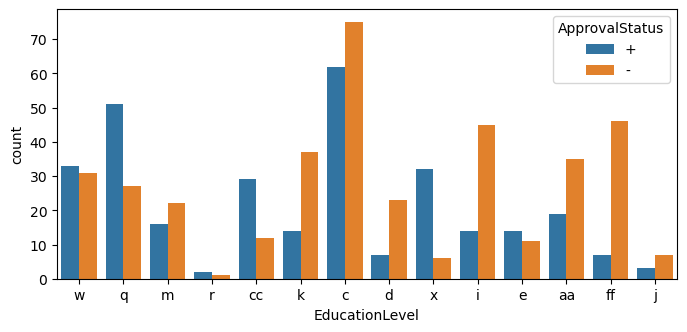

In [22]:
# CHECKING BANKCUSTOMER DISTRIBUTION
plt.figure(figsize=(8,3.5))

sns.countplot(x=cc_data['EducationLevel'], hue=cc_data['ApprovalStatus'])
plt.show()

In [23]:
# COUNT #MISSING VALUES
cc_data['EducationLevel'].isnull().sum()

9

In [24]:
cc_data['EducationLevel'] = cc_data['EducationLevel'].fillna(cc_data['EducationLevel'].value_counts().index[0])
cc_data['EducationLevel'].isnull().sum()

0

##### HANDLING MISSING VALUES IN 'ETHNICITY' 

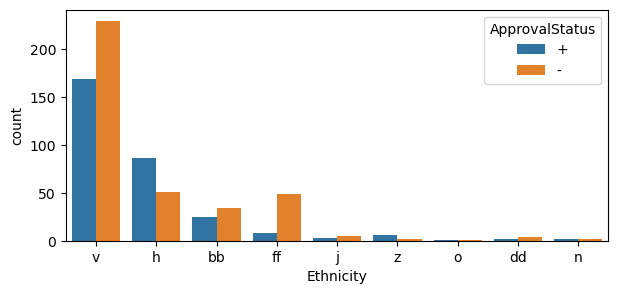

In [25]:
# CHECKING ETHNICITY DISTRIBUTION
plt.figure(figsize=(7,3))

sns.countplot(x=cc_data['Ethnicity'], hue=cc_data['ApprovalStatus'])
plt.show()

In [26]:
# COUNT #MISSING VALUES
cc_data['Ethnicity'].isnull().sum()

9

In [27]:
cc_data['Ethnicity'] = cc_data['Ethnicity'].fillna(cc_data['Ethnicity'].value_counts().index[0])
cc_data['Ethnicity'].isnull().sum()

0

##### HANDLING MISSING VALUES IN 'ZIPCODE' 

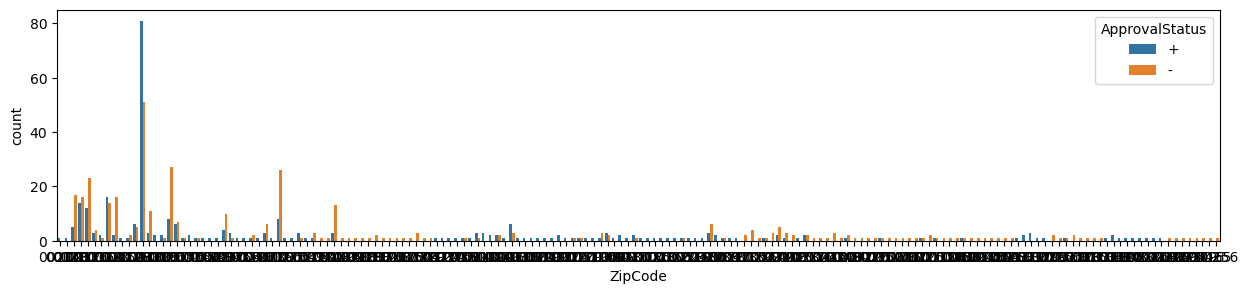

In [28]:
# CHECKING ETHNICITY DISTRIBUTION
plt.figure(figsize=(15,3))

sns.countplot(x=cc_data['ZipCode'], hue=cc_data['ApprovalStatus'])
plt.show()

In [29]:
cnt_zip = cc_data['ZipCode'].value_counts()
cnt_zip

00000    132
00120     35
00200     35
00160     34
00100     30
        ... 
00021      1
00393      1
00395      1
00093      1
00256      1
Name: ZipCode, Length: 170, dtype: int64

In [30]:
# COUNT #MISSING VALUES
cc_data['ZipCode'].isnull().sum()

13

In [31]:
cc_data['ZipCode'] = cc_data['ZipCode'].fillna(cc_data['ZipCode'].value_counts().index[0])
cc_data['ZipCode'].isnull().sum()

0

In [32]:
# STILL NUMERIC MISSING VALUES ARE TO BE HANDLED
cc_data.isnull().sum()

Gender             0
Age               12
Debt               0
Married            0
BankCustomer       0
EducationLevel     0
Ethnicity          0
YearsEmployed      0
PriorDefault       0
Employed           0
CreditScore        0
DriversLicense     0
Citizen            0
ZipCode            0
Income             0
ApprovalStatus     0
dtype: int64

##### HANDLING MISSING VALUES IN AGE

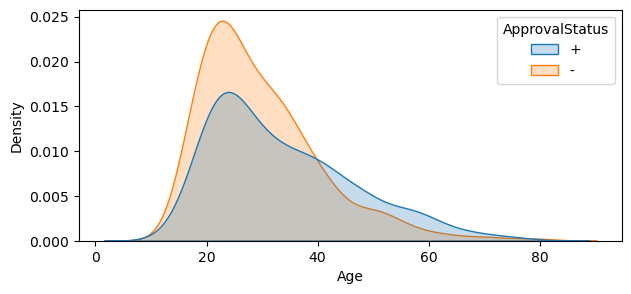

In [33]:
# CHECKING AGE DISTRIBUTION
plt.figure(figsize=(7,3))

sns.kdeplot(x=cc_data['Age'], hue=cc_data['ApprovalStatus'], fill=True)
plt.show()

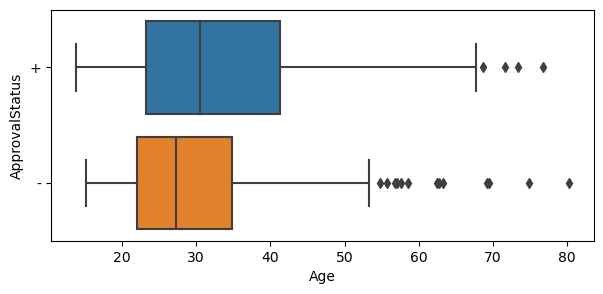

In [34]:
plt.figure(figsize=(7,3))

sns.boxplot(data=cc_data, x='Age', y='ApprovalStatus')
plt.show()

In [35]:
# COUNT #MISSING VALUES
cc_data['Age'].isnull().sum()

12

In [36]:
cc_data['Age'] = cc_data['Age'].fillna(cc_data['Age'].mean())
cc_data['Age'].isnull().sum()

0

In [37]:
cc_data.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [38]:
cc_data.isnull().sum().sum()

0

#### HANDLING OUTLIERS

In [39]:
# NUMERICAL FEATURES - 'AGE', 'DEBT', 'YEARSEMPLOYED', 'CREDITSCORE', 'INCOME'
